<a href="https://colab.research.google.com/github/Dansah2/Free_Code_Camp_Tutorials/blob/main/FCC_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
# https://www.youtube.com/watch?v=VtRLrQ3Ev-U

In [ ]:
df = pd.read_csv('wine-reviews.csv', usecols=['country', 'description', 'points', 'price', 'variety', 'winery'])

In [ ]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [ ]:
df = df.dropna(subset=['description', 'points'])

In [ ]:
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


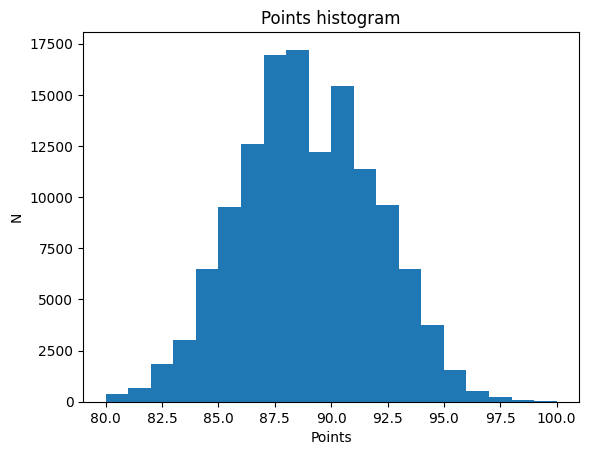

In [ ]:
plt.hist(df.points, bins=20)
plt.title('Points histogram')
plt.ylabel('N')
plt.xlabel('Points')
plt.show()

In [ ]:
df['label'] =(df.points >= 90).astype(int)
df = df[['description', 'points', 'label']]
df

,description,points,label
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0
...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1
129967,Citation is given as much as a decade of bottl...,90,1
129968,Well-drained gravel soil gives this wine its c...,90,1
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [ ]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [ ]:
# convert a pandas dataframe to a tensorflow dataset

def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['description']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [ ]:
# must use list to see what the tensor containes

list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'This opens with delicate scents of violet and wild berry. The slender, nervous palate offers suggestions of sour cherry, clove and powdered sage set against bracing acidity. Close-grained tannins leave a drying, rather astringent finish.',
        b"This Pinot certainly has lots of concentrated fruit, with an intensity of cherry and raspberry jam, pomegranates and cola. It's also well oaked, to judge from the strong layer of buttered cinnamon toast. Feels strong and indelicate now, with a punch of acidity, but could mellow over the next 2\xe2\x80\x933 years.",
        b"Shows a marked improvement over the winery's previous Chards, offering real richness of flavor and good structure. With oak-inspired apricot, pear and citrus flavors, it's an upscale wine to drink now.",
        ...,
        b'The Merlot gives richness, with sweet fruit and a good core of appetizing tannins, freshened with acidity.',
        b'This 100% varietal

In [ ]:
# change the word to numbers in the dataset
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [ ]:
# call the hub layer on the dataset but only the column with strings

hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.5069208 , -0.01465555,  0.10249898, ..., -0.10653111,
        -0.40905368,  0.18832634],
       [ 0.15333039, -0.43147823, -0.35089663, ...,  0.11600932,
        -0.13259828, -0.12282474],
       [ 0.2977611 , -0.29683602,  0.17443535, ..., -0.02686576,
        -0.07188447,  0.1416226 ],
       ...,
       [ 0.35787895, -0.17463118, -0.02860609, ...,  0.05562734,
        -0.53353053, -0.2762757 ],
       [ 0.35912892, -0.19394872,  0.13187866, ...,  0.06384711,
        -0.09450604,  0.11521063],
       [ 0.3225652 ,  0.05911615, -0.0341229 , ..., -0.13542946,
        -0.45798647,  0.01695271]], dtype=float32)>

In [ ]:
model =tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# evaluate the untrained model on the training data
model.evaluate(train_data)

102/102 [==============================] - 6s 14ms/step - loss: 0.7365 - accuracy: 0.3772


[0.736508846282959, 0.37719282507896423]

In [ ]:
# evaluate the untrained model on the validation data
model.evaluate(valid_data)

13/13 [==============================] - 0s 15ms/step - loss: 0.7369 - accuracy: 0.3768


[0.7368894219398499, 0.3767792582511902]

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 23s 196ms/step - loss: 0.6535 - accuracy: 0.6048 - val_loss: 0.5502 - val_accuracy: 0.7469
Epoch 2/10
102/102 [==============================] - 16s 158ms/step - loss: 0.4945 - accuracy: 0.7599 - val_loss: 0.4070 - val_accuracy: 0.8156
Epoch 3/10
102/102 [==============================] - 11s 109ms/step - loss: 0.4086 - accuracy: 0.8221 - val_loss: 0.3798 - val_accuracy: 0.8278
Epoch 4/10
102/102 [==============================] - 8s 82ms/step - loss: 0.3697 - accuracy: 0.8448 - val_loss: 0.3717 - val_accuracy: 0.8300
Epoch 5/10
102/102 [==============================] - 9s 82ms/step - loss: 0.3450 - accuracy: 0.8580 - val_loss: 0.3727 - val_accuracy: 0.8318
Epoch 6/10
102/102 [==============================] - 6s 60ms/step - loss: 0.3259 - accuracy: 0.8665 - val_loss: 0.3818 - val_accuracy: 0.8317
Epoch 7/10
102/102 [==============================] - 5s 49ms/step - loss: 0.3094 - accuracy: 0.8740 - val_loss: 0.3806 - val_accuracy: 

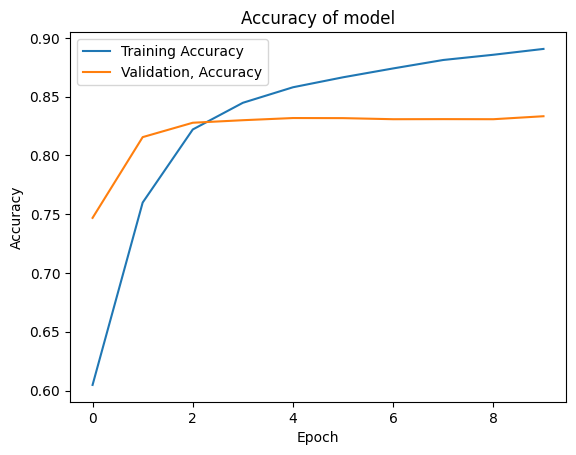

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation, Accuracy')
plt.title('Accuracy of model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

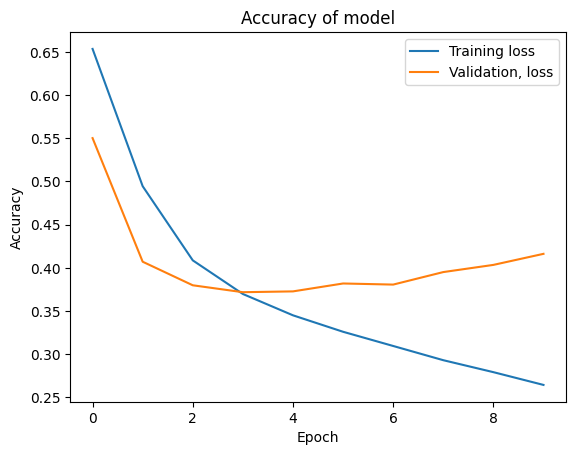

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation, loss')
plt.title('Accuracy of model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 0s 8ms/step - loss: 0.4374 - accuracy: 0.8247


[0.4374268352985382, 0.8247422575950623]

In [ ]:
# Use LSTM instead of hub model to vectorize the text

encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'in', 'flavors', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

In [ ]:
# create the model using the LSTM encoder
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# evaluate untrained model
model.evaluate(train_data)
model.evaluate(valid_data)

13/13 [==============================] - 0s 18ms/step - loss: 0.6935 - accuracy: 0.4299


[0.6935123801231384, 0.4298684298992157]

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 17s 105ms/step - loss: 0.5490 - accuracy: 0.7097 - val_loss: 0.3780 - val_accuracy: 0.8256
Epoch 2/5
102/102 [==============================] - 4s 39ms/step - loss: 0.3694 - accuracy: 0.8351 - val_loss: 0.3426 - val_accuracy: 0.8444
Epoch 3/5
102/102 [==============================] - 5s 51ms/step - loss: 0.3476 - accuracy: 0.8453 - val_loss: 0.3432 - val_accuracy: 0.8453
Epoch 4/5
102/102 [==============================] - 4s 38ms/step - loss: 0.3413 - accuracy: 0.8483 - val_loss: 0.3423 - val_accuracy: 0.8467
Epoch 5/5
102/102 [==============================] - 4s 38ms/step - loss: 0.3373 - accuracy: 0.8507 - val_loss: 0.3393 - val_accuracy: 0.8469


In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 0s 24ms/step - loss: 0.3624 - accuracy: 0.8332


[0.3623766303062439, 0.8332051038742065]

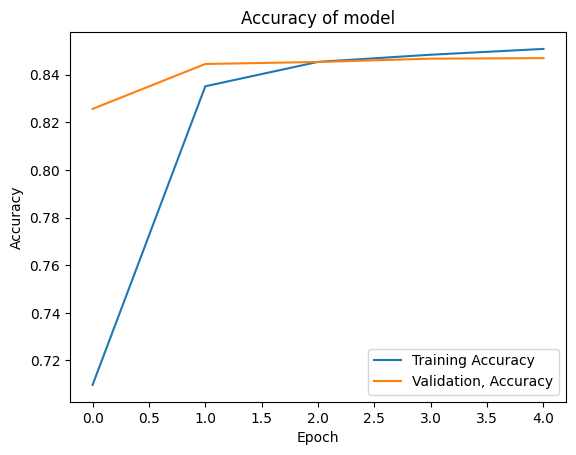

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation, Accuracy')
plt.title('Accuracy of model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

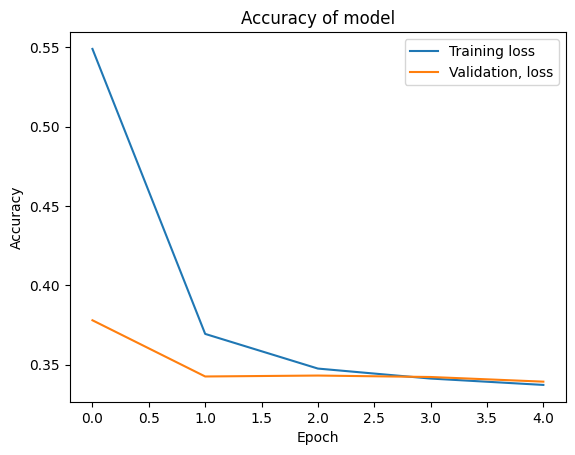

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation, loss')
plt.title('Accuracy of model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
